# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


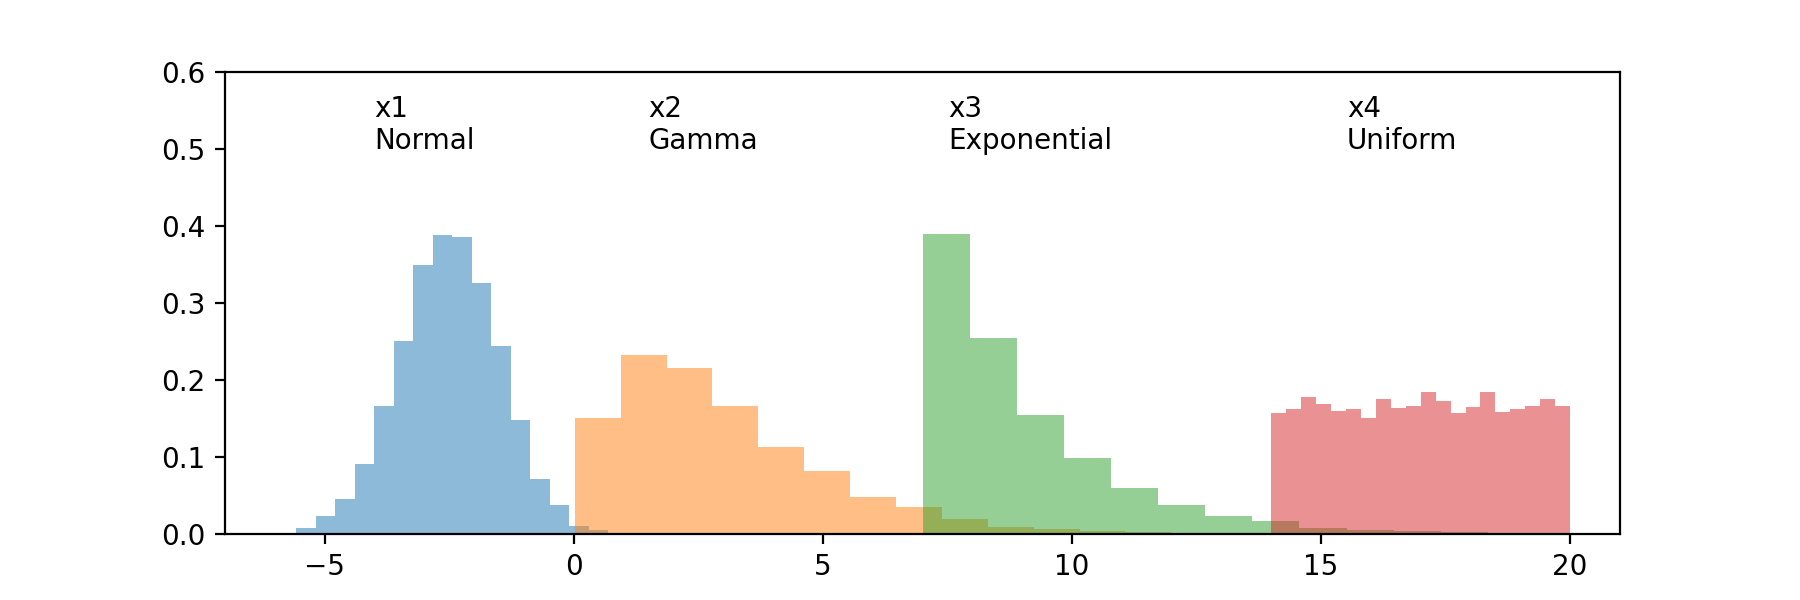

Text(15.517123494960945, 0.5, 'x4\nUniform')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)


# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, density=True, bins=20, alpha=0.5)
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')



<IPython.core.display.Javascript object>


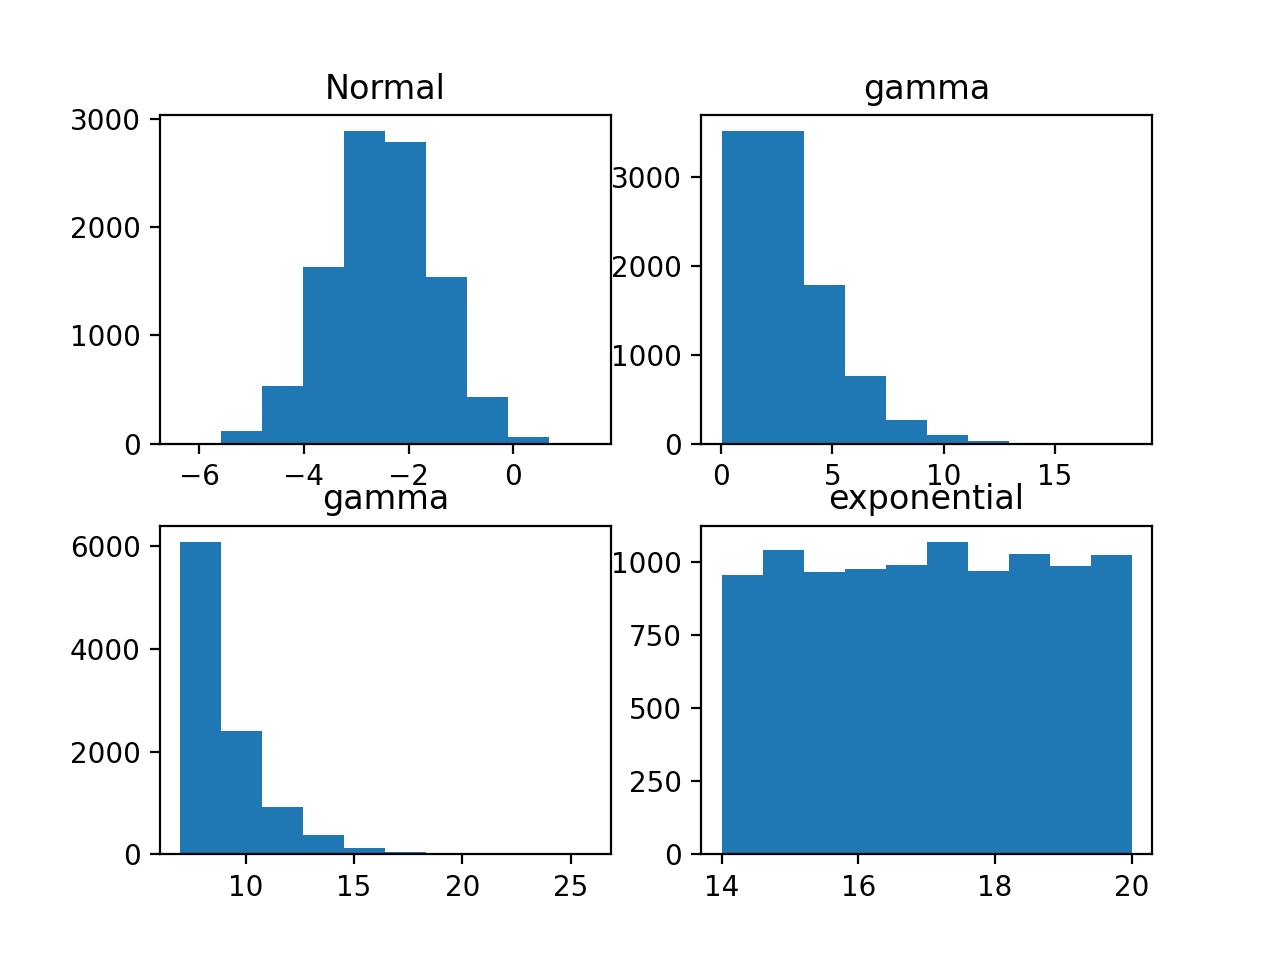

<IPython.core.display.Javascript object>


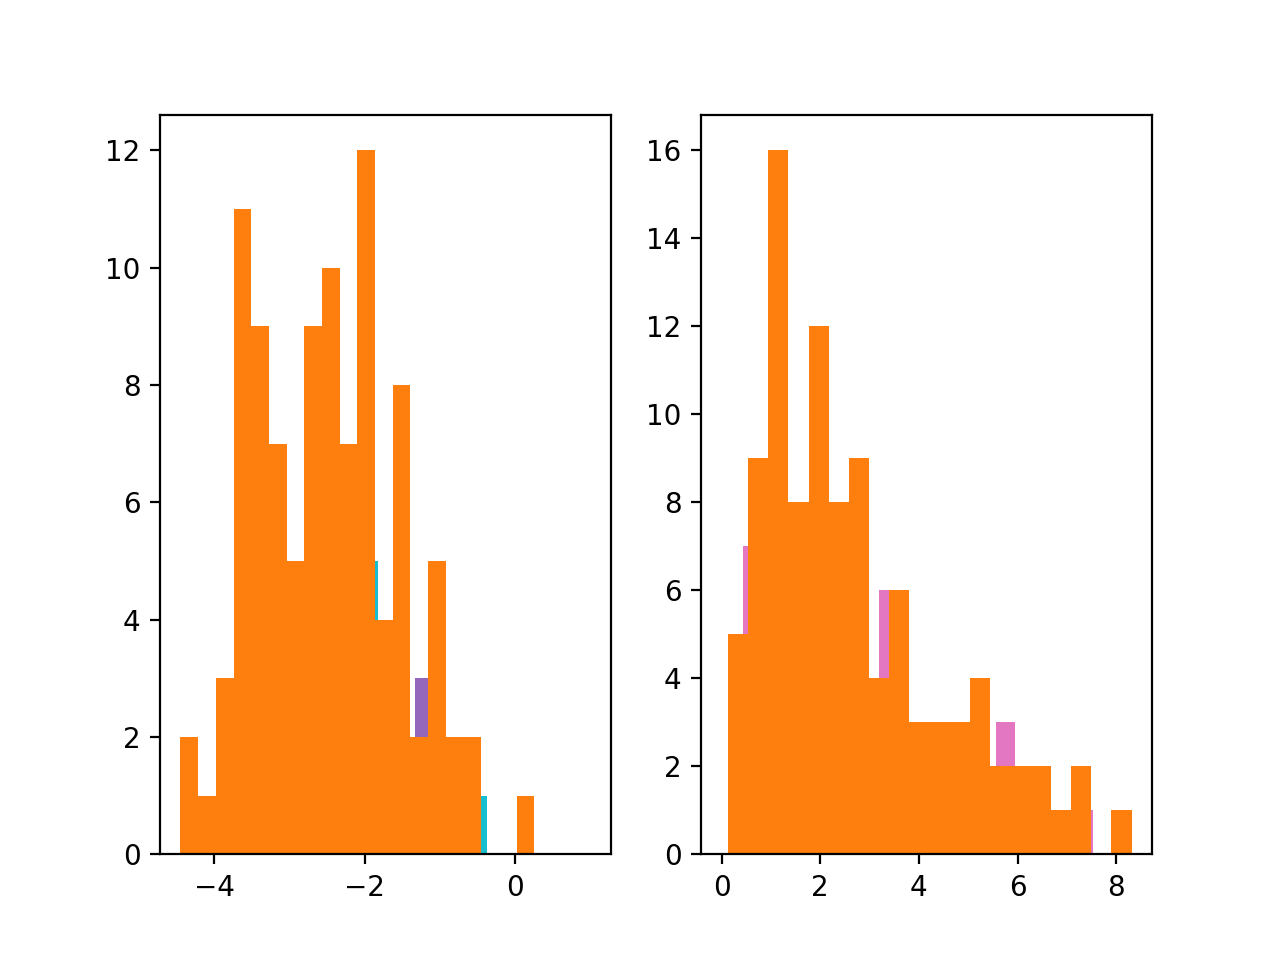

<class 'numpy.ndarray'>
-4.224088011736886
<class 'numpy.ndarray'>
3.60198850595949


In [3]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
#first we make a 2x2 subplot I store them in an array to use in for loop
axs = [ax1,ax2,ax3,ax4]
fun = [x1,x2,x3,x4]

#for each numbr in 0 through len(axs) (which should be 0-4)
#get the according subplot array index and first plot a histogram of it using the information from
#the above code section
#next I set a title based on the data (or ditribution sample) used
for n in range(0,len(axs)):
    axs[n].hist(fun[n])
    if n == 0:
        sample_size = "Normal"
    elif n == 1:
        sample_size = "gamma"
    elif n == 3:
        sample_size = "exponential"
    elif n == 4:
        sample_size = "uniform"
    axs[n].set_title('{}'.format(sample_size))
    
plt.subplots_adjust(hspace = .25)
############################################################################
#from random import sample 
import matplotlib.animation as animation

#next we use animaiton to build graphs
# first I create a array called funy w/ 2 indexes for now
funy = [None]*2 #[y1,y2,y3,y4]
#creare 1x2 subplot and store them in array
fig,((bx1,bx2))=plt.subplots(1,2)
bxs = [bx1,bx2]

#Next I grab 100 samples from two (a in function arguments) of the distributions used above and store the
#two sets of numbers in the funy array
for i in (0,len(fun)-3):
    print(type(fun[i]))
    print(fun[i][1])
    funy[i] = np.random.choice(a=fun[i],size=100)
    
#n is our interval (I think the number of frames???)
n = 100

#Update is our animaiton function
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    #we plot our two subplors with the two samples 
    #[:curr] means plot up to that current number.
    bx1.hist(funy[0][:curr],bins=20)
    bx2.hist(funy[1][:curr],bins=20)
    
a = animation.FuncAnimation(fig, update, interval=n)